# Library

In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Load Data

In [3]:
data = pd.read_csv("white_wine.csv")

In [4]:
data.shape 

(520, 12)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


# EDA

In [6]:
# check missing value
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [7]:
# drop missing value
data = data.dropna()

# re-check missing value
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# define label
# > 6 is good, otherwise bad

data["quality"] = np.where(data["quality"] > 6, 1, 0)

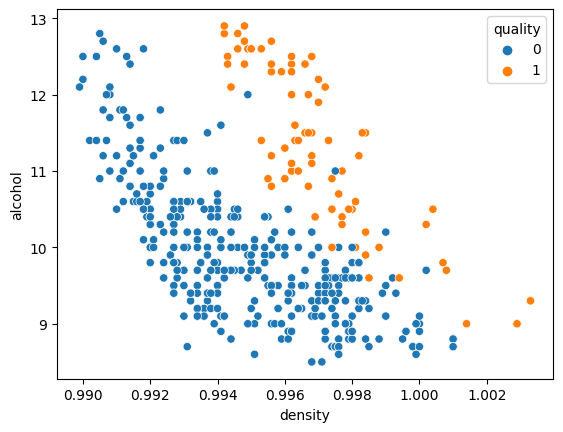

In [10]:
# visualize dataset to get clear insight
sns.scatterplot(data = data, x = "density", y = "alcohol", hue = "quality")
plt.show()

C:\Users\Annur Afgoni\AppData\Local\Temp\ipykernel_18436\1055292872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[["alcohol"]] = scaler.fit_transform(df_temp[["alcohol"]])
C:\Users\Annur Afgoni\AppData\Local\Temp\ipykernel_18436\1055292872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[["density"]] = scaler.fit_transform(df_temp[["density"]])


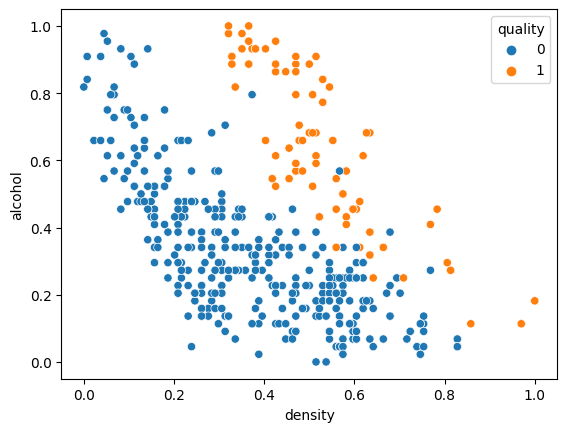

In [17]:
# what if the two dataset has same scaled

scaler = MinMaxScaler(feature_range=(0, 1))

df_temp = data[["alcohol", "density", "quality"]]
df_temp[["alcohol"]] = scaler.fit_transform(df_temp[["alcohol"]])
df_temp[["density"]] = scaler.fit_transform(df_temp[["density"]])

# visualized scaled data
sns.scatterplot(data = df_temp, x = "density", y = "alcohol", hue = "quality")
plt.show()

# Modelling

In [21]:
# split

X_train, X_test, y_train, y_test = train_test_split(
    data[["alcohol", "density"]],
    data["quality"],
    test_size = 0.2,
    random_state = 2023
)

In [23]:
# define model
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)

# training
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [24]:
# validate result in test set
y_pred = tree.predict(X_test)

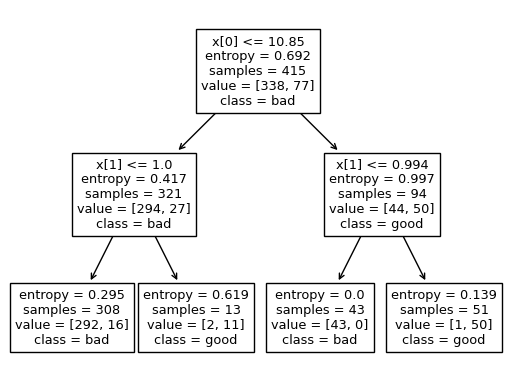

In [27]:
plot_tree(tree, class_names = ["bad", "good"])
plt.show()